In [2]:
#import pandas
import pandas as pd 
import numpy as np 

#allow jupyter notebook to show graphs inline
%matplotlib inline

#have pandas read the csv file for the work assessment
app_df = pd.read_csv("AppStoreAssessmentDataScience.csv")

#print the head of the csv (primarily for making sure that csv is loading correctly)
app_df.head(5)

,Unnamed: 0,id,app_size_bytes,app_price,app_rating_count,app_rating,app_content_rating,app_genre,app_total_supported_langs
0,1,281656475,100788224,3.99,21292,4.0,4+,Games,10
1,2,281796108,158578688,0.00,161065,4.0,4+,Productivity,23
2,3,281940292,100524032,0.00,188583,3.5,4+,Weather,3
3,4,282614216,128512000,0.00,262241,4.0,12+,Shopping,9
4,5,282935706,92774400,0.00,985920,4.5,4+,Reference,45


In [3]:
#for data cleaning (this datasest doesn't need it, but I thought it was important to still at least do the basics)
print(app_df.isnull().values.sum())
app_df.dropna()

0


,Unnamed: 0,id,app_size_bytes,app_price,app_rating_count,app_rating,app_content_rating,app_genre,app_total_supported_langs
0,1,281656475,100788224,3.99,21292,4.0,4+,Games,10
1,2,281796108,158578688,0.00,161065,4.0,4+,Productivity,23
2,3,281940292,100524032,0.00,188583,3.5,4+,Weather,3
3,4,282614216,128512000,0.00,262241,4.0,12+,Shopping,9
4,5,282935706,92774400,0.00,985920,4.5,4+,Reference,45
5,6,283619399,10485713,0.99,8253,4.0,4+,Games,1
6,7,283646709,227795968,0.00,119487,4.0,4+,Finance,19
7,8,284035177,130242560,0.00,1126879,4.0,12+,Music,1
8,9,284666222,49250304,9.99,1117,4.5,4+,Utilities,1
9,10,284736660,70023168,3.99,7885,4.0,4+,Games,10


In [4]:
#Data Manipulation

#Function used by apply to turn the bytes into megabytes for easier understanding and context
def byteToMB(row):
    return int(row['app_size_bytes'])/1000000

#call apply on rows of the existing dataset and add the returned values into a new column
app_df['app_size_mb'] = app_df.apply(byteToMB, axis=1)

#print head of dataframe again, to make sure changes worked
app_df.head(5)

,Unnamed: 0,id,app_size_bytes,app_price,app_rating_count,app_rating,app_content_rating,app_genre,app_total_supported_langs,app_size_mb
0,1,281656475,100788224,3.99,21292,4.0,4+,Games,10,100.788224
1,2,281796108,158578688,0.00,161065,4.0,4+,Productivity,23,158.578688
2,3,281940292,100524032,0.00,188583,3.5,4+,Weather,3,100.524032
3,4,282614216,128512000,0.00,262241,4.0,12+,Shopping,9,128.512000
4,5,282935706,92774400,0.00,985920,4.5,4+,Reference,45,92.774400


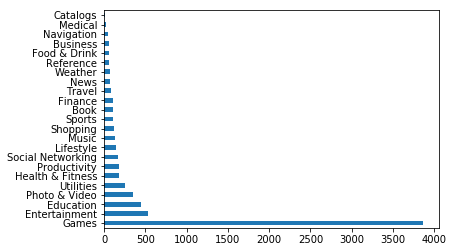

In [5]:
#Visualization 1

#plot the count of each genre of app in a horizontal bar graph
app_df['app_genre'].value_counts().plot(kind='barh')

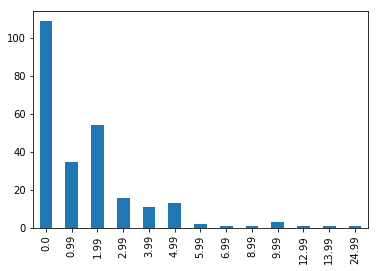

In [6]:
#Visualization 2

#plot a bar graph of all the prices of utilities applications
app_df[app_df['app_genre'] == 'Utilities']['app_price'].value_counts().sort_index().plot(kind='bar')

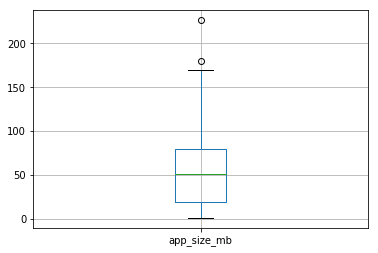

In [7]:
#Visualization 3

#Create a boxplot of the app sizes of utility apps
app_df[app_df['app_genre'] == 'Utilities'].boxplot(column='app_size_mb')

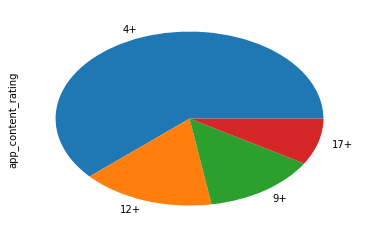

In [8]:
#Visualization 4

#Create pie chart of the content ratings
app_df['app_content_rating'].value_counts().plot(kind='pie')

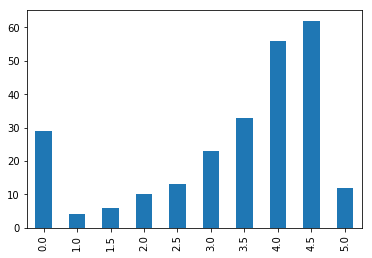

In [9]:
#Visualization 5

#Create a bar Chart of the Different app ratings and their distribution
app_df[app_df['app_genre'] == 'Utilities']['app_rating'].value_counts().sort_index().plot(kind='bar')

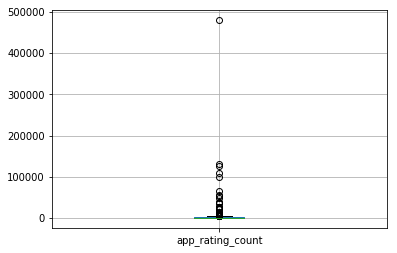

In [10]:
#Visualization 6a

#Show a boxplot of the total count of ratings of utilities apps
app_df[app_df['app_genre'] == 'Utilities'].boxplot(column='app_rating_count')

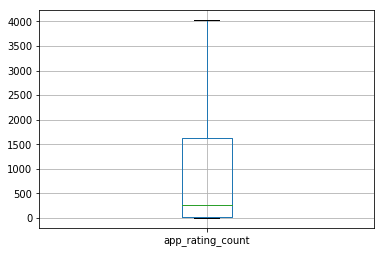

In [11]:
#Visualization 6b

#Show boxplot of ratings count without outliers
app_df[app_df['app_genre'] == 'Utilities'].boxplot(column='app_rating_count', showfliers=False)